In [93]:
import numpy as np
import pandas as pd

In [94]:
df = pd.read_csv('proj.csv', header=1)
df.head()

,1,k,Название проекта,Unnamed: 3,Тип,Руководитель направления,Руководитель проекта,Консультант/ куратор,Команда проекта,Описание проекта
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,Изучение транспорта заряженных коллоидных част...,NaN,НИР,Буровский Евгений Андреевич,Бараш Лев Юрьевич,NaN,1 вакансия,https://docs.google.com/document/d/1JeYBSshdot...
2,3.0,2.0,Изучение конвекции Марангони и транспорта колл...,NaN,НИР,Буровский Евгений Андреевич,Бараш Лев Юрьевич,NaN,1 вакансия,https://docs.google.com/document/d/1JeYBSshdot...
3,4.0,3.0,Разработка программного комплекса решения эндш...,NaN,НИР,Буровский Евгений Андреевич,Бараш Лев Юрьевич,NaN,1 вакансия,https://docs.google.com/document/d/1JeYBSshdot...
4,5.0,4.0,Программа объединения точек платежей для проти...,NaN,Прогр.,Давыдов Вячеслав Анатольевич,NaN,Воробьев Иван Александрович,3 вакансии,https://docs.google.com/document/d/1LOI74I-abN...


In [95]:
df = df.drop(columns=['1', 'Unnamed: 3', 'Руководитель направления','Руководитель проекта','Консультант/ куратор','Команда проекта','Описание проекта'])
df = df.dropna(subset=['k'])
df.head()

,k,Название проекта,Тип
1,1.0,Изучение транспорта заряженных коллоидных част...,НИР
2,2.0,Изучение конвекции Марангони и транспорта колл...,НИР
3,3.0,Разработка программного комплекса решения эндш...,НИР
4,4.0,Программа объединения точек платежей для проти...,Прогр.
5,5.0,Антифрод (antifraud),Прогр.


In [96]:
df = df.rename(columns={'k': 'num', 'Название проекта': 'title', 'Тип': 'type'})

In [100]:
df.type.unique()

array(['НИР', 'Прогр.', 'Прогр-аппарат.', 'empty'], dtype=object)

In [99]:
df['type'] = df['type'].fillna('empty')

In [101]:
all_categories = df.type.values.tolist()

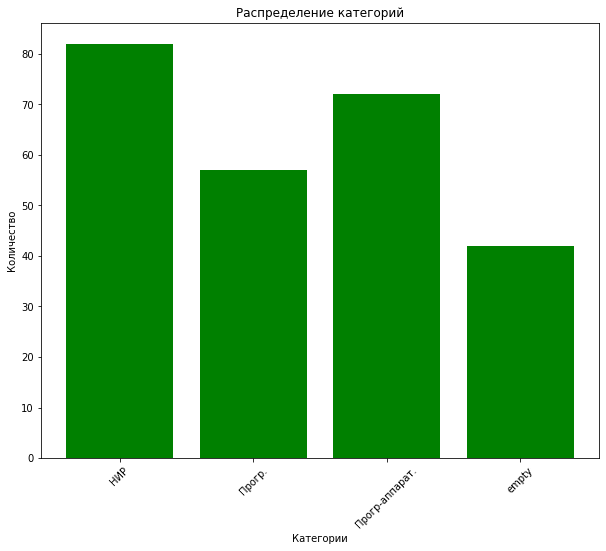

In [104]:
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
c = Counter(all_categories)
plt.xticks(rotation=45)
plt.title('Распределение категорий')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.bar(c.keys(), c.values(), color = "green")
plt.show()

In [105]:
all_titles = str()

for i in df.title:
    all_titles += i + ' '

In [106]:
import re

all_titles_clean = re.sub('[^A-Za-zA-Яа-я0-9°]+', ' ', all_titles)
all_titles_clean = all_titles_clean.replace('\n', '').lower()

In [107]:
df.to_csv('miem_data.csv', index=False)